In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [3]:
import os
import math

import numpy
import pandas
import librosa
import soundfile

from matplotlib import pyplot as plt
import librosa.display

import brewaed
from brewaed import utils, labels, beerbubble


<AxesSubplot:xlabel='time'>

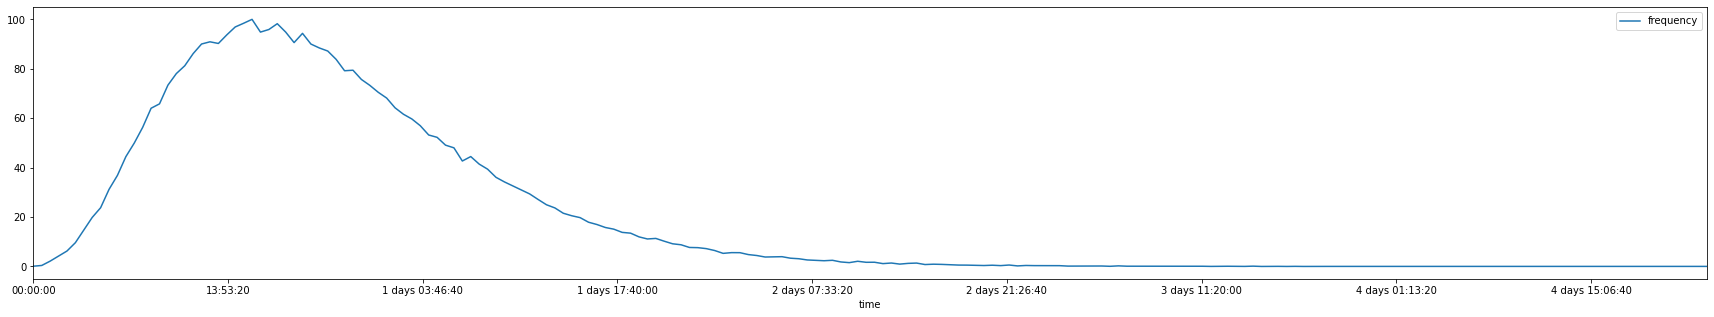

In [4]:
f = beerbubble.synthesize_fermentation_rate()
fig, ax = plt.subplots(1, figsize=(30, 5))
f.plot(ax=ax)


<AxesSubplot:xlabel='time'>

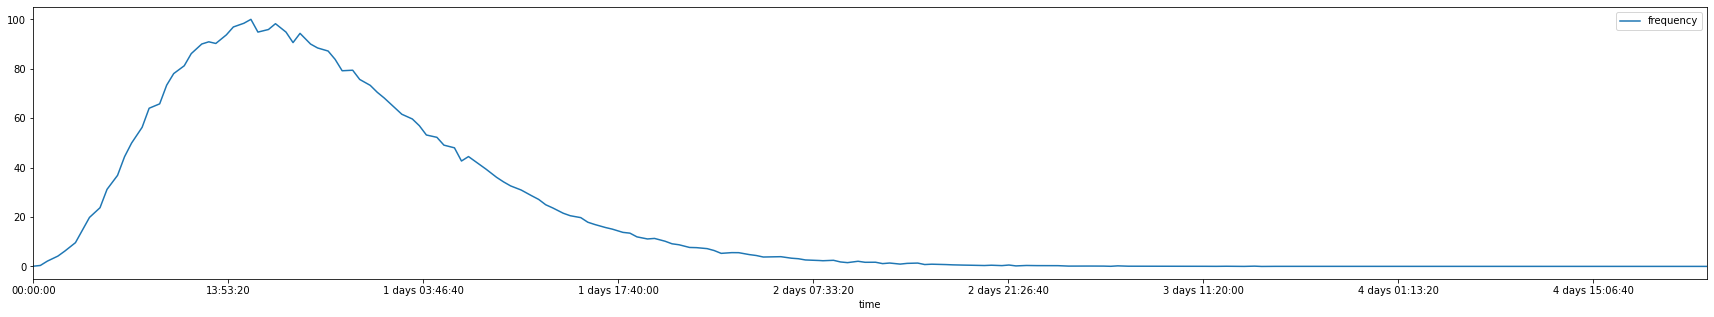

In [5]:
fig, ax = plt.subplots(1, figsize=(30, 5))
f.resample('15min').mean().interpolate().plot(ax=ax)

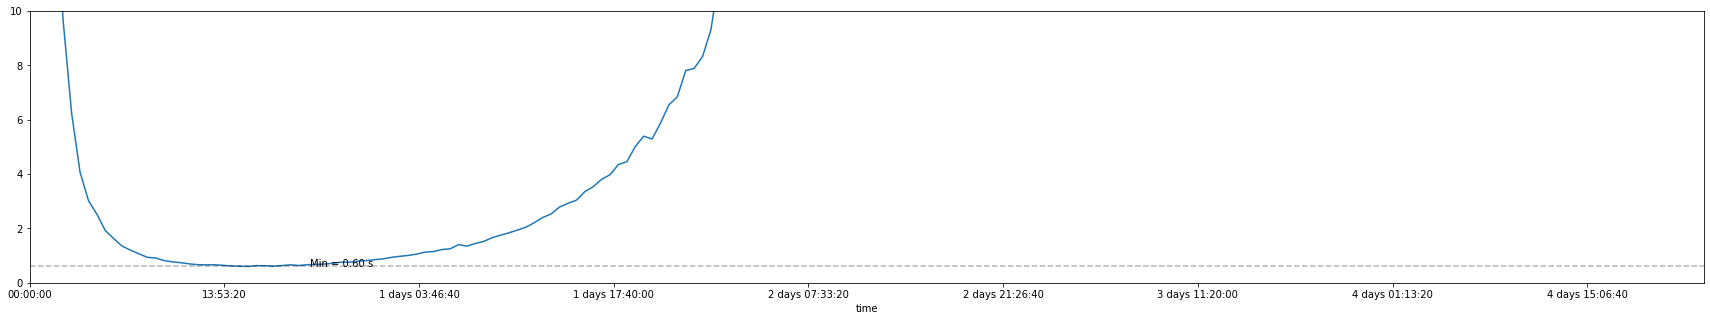

In [6]:

def plot_time_between(df):

    fig, ax = plt.subplots(1, figsize=(30, 5))
    df.plot(ax=ax)
    ax.set(ylim=(0, 10))
    min_time = time_between.min()
    min_pos = pandas.to_timedelta(20, unit='hour')

    ax.axhline(y=min_time, color='black', alpha=0.3, ls='--')
    ax.text(y=min_time, x=min_pos.total_seconds()*1e9, s=f'Min = {min_time:.2f} s')

time_between = (1/f.frequency) * 60
    
plot_time_between(time_between)

In [7]:
# Generate synthetic events to match event rates
ee = beerbubble.generate_events(time_between[time_between != numpy.inf])
ee['sec'] = ee['time'].dt.total_seconds()
ee

,time,sec
0,0 days 00:02:31.847378423,151.847378
1,0 days 00:05:03.765039896,303.765040
2,0 days 00:07:35.551833900,455.551834
3,0 days 00:10:07.397744540,607.397745
4,0 days 00:12:39.349290073,759.349290
...,...,...
142273,4 days 20:11:01.367952231,418261.367952
142274,4 days 21:01:38.569282980,421298.569283
142275,4 days 21:52:15.783926411,424335.783926
142276,4 days 22:42:52.944797783,427372.944798


<AxesSubplot:xlabel='time'>

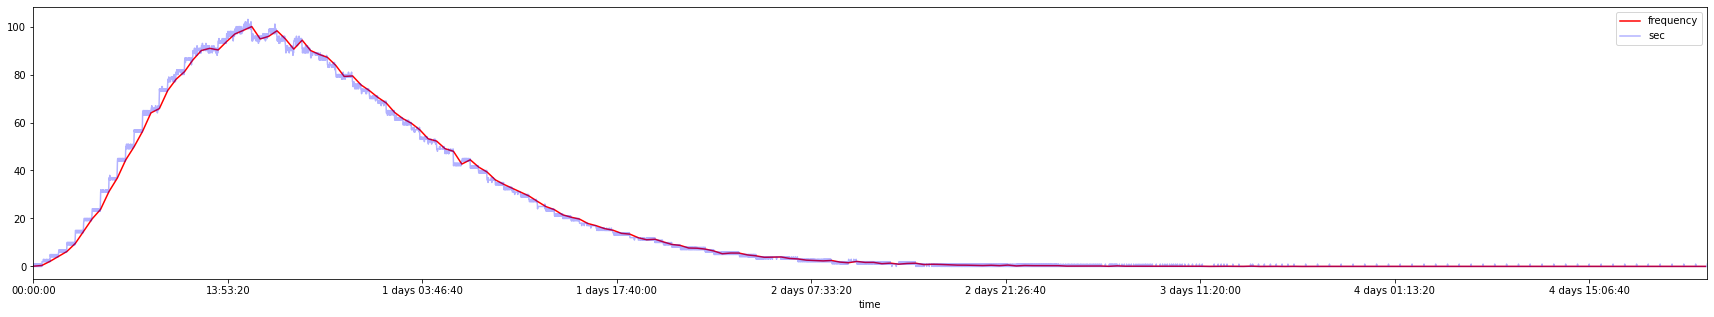

In [8]:
# compare synthetic events with input curve
et = ee.set_index('time')
fig, ax = plt.subplots(1, figsize=(30, 5))
f.plot(ax=ax, color='red')
et.resample('1min').count().plot(ax=ax, color='blue', alpha=0.3)